# **Installing required Libraries..**

In [1]:
pip install pandas numpy nltk scikit-learn matplotlib seaborn wordcloud


# **Load & preprocess Dataset**

In [21]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("training.1600000.processed.noemoticon.csv" , encoding='latin-1', header=None)

# Assign column names
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Keep only relevant columns
df = df[['target', 'text']]

# Convert target labels (0: Negative, 4: Positive)
df.loc[:, 'target'] = df['target'].replace({0: 0, 4: 1})

# Sample dataset (for faster training)
df = df.sample(50000, random_state=42)

# Display dataset info
print(df.head())



        target                                               text
541200       0             @chrishasboobs AHHH I HOPE YOUR OK!!! 
750          0  @misstoriblack cool , i have no tweet apps  fo...
766711       0  @TiannaChaos i know  just family drama. its la...
285055       0  School email won't open  and I have geography ...
705995       0                             upper airways problem 


# **Data Preprocessing**

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions/hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


        target                                               text  \
541200       0             @chrishasboobs AHHH I HOPE YOUR OK!!!    
750          0  @misstoriblack cool , i have no tweet apps  fo...   
766711       0  @TiannaChaos i know  just family drama. its la...   
285055       0  School email won't open  and I have geography ...   
705995       0                             upper airways problem    

                                               clean_text  
541200                                       ahhh hope ok  
750                                cool tweet apps razr 2  
766711  know family drama lamehey next time u hang kim...  
285055  school email wont open geography stuff revise ...  
705995                               upper airway problem  


# **Text Vectorization using TF-IDF**

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Model Training (Logistic Regression)**

In [16]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7546
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4977
           1       0.75      0.77      0.76      5023

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



# **Sentiment Visualization**

<ipython-input-17-5fcf2c04d54f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette='coolwarm')


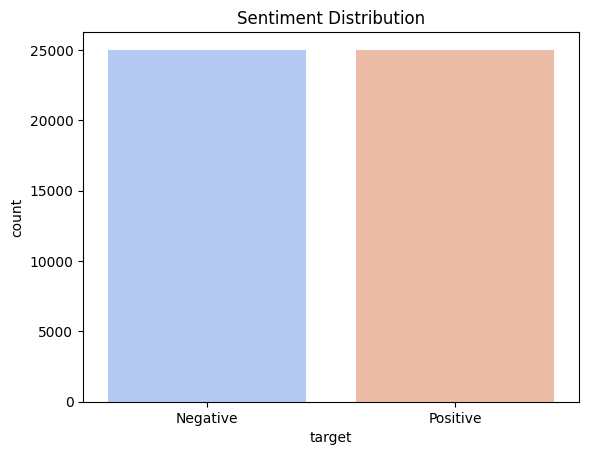

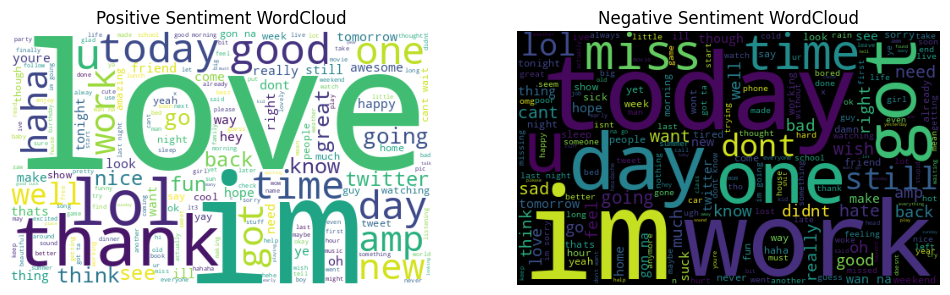

In [17]:
# Count plot of sentiments
sns.countplot(x=df['target'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xticks(ticks=[0,1], labels=['Negative', 'Positive'])
plt.show()

# WordCloud for Positive & Negative Tweets
positive_words = ' '.join(df[df['target'] == 1]['clean_text'])
negative_words = ' '.join(df[df['target'] == 0]['clean_text'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Positive Sentiment WordCloud")
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_words))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Negative Sentiment WordCloud")
plt.imshow(WordCloud(width=500, height=300, background_color='black').generate(negative_words))
plt.axis("off")

plt.show()


# **Testing with Custom Input**

In [19]:
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return "Positive" if prediction[0] == 1 else "Negative"

# Example test
sample_tweet = "This phone is awful! The camera quality is terrible and it keeps freezing."

print(f"Sentiment: {predict_sentiment(sample_tweet)}")


Sentiment: Negative
